In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
df1=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
df2=pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df2

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [4]:
df3=pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df3

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [5]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,NaN
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,NaN
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,NaN
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,NaN
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578047,NaN,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,0.0
578048,NaN,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0,1.0
578049,NaN,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0.0
578050,NaN,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,0.0


In [6]:
df = df.drop(columns=["Diabetes_012"])

In [7]:
print(df.isnull().sum())

HighBP                       0
HighChol                     0
CholCheck                    0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
PhysActivity                 0
Fruits                       0
Veggies                      0
HvyAlcoholConsump            0
AnyHealthcare                0
NoDocbcCost                  0
GenHlth                      0
MentHlth                     0
PhysHlth                     0
DiffWalk                     0
Sex                          0
Age                          0
Education                    0
Income                       0
Diabetes_binary         253680
dtype: int64


In [8]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 120670


In [9]:
df = df.drop_duplicates()
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,NaN
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,NaN
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,NaN
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,NaN
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578045,1.0,0.0,1.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,3.0,14.0,4.0,0.0,1.0,3.0,6.0,8.0,0.0
578046,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0,0.0
578047,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0,0.0
578049,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0,0.0


In [10]:
# Handle missing values (e.g., using median imputation for numerical columns)
imputer = SimpleImputer(strategy='median')
df= pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [11]:
from imblearn.over_sampling import SMOTE

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Verify distribution
print(pd.Series(y_res).value_counts())

Diabetes_binary
0.0    422285
1.0    422285
Name: count, dtype: int64


In [12]:
df = pd.DataFrame(X_res, columns=X.columns)
df['Diabetes_binary'] = y_res

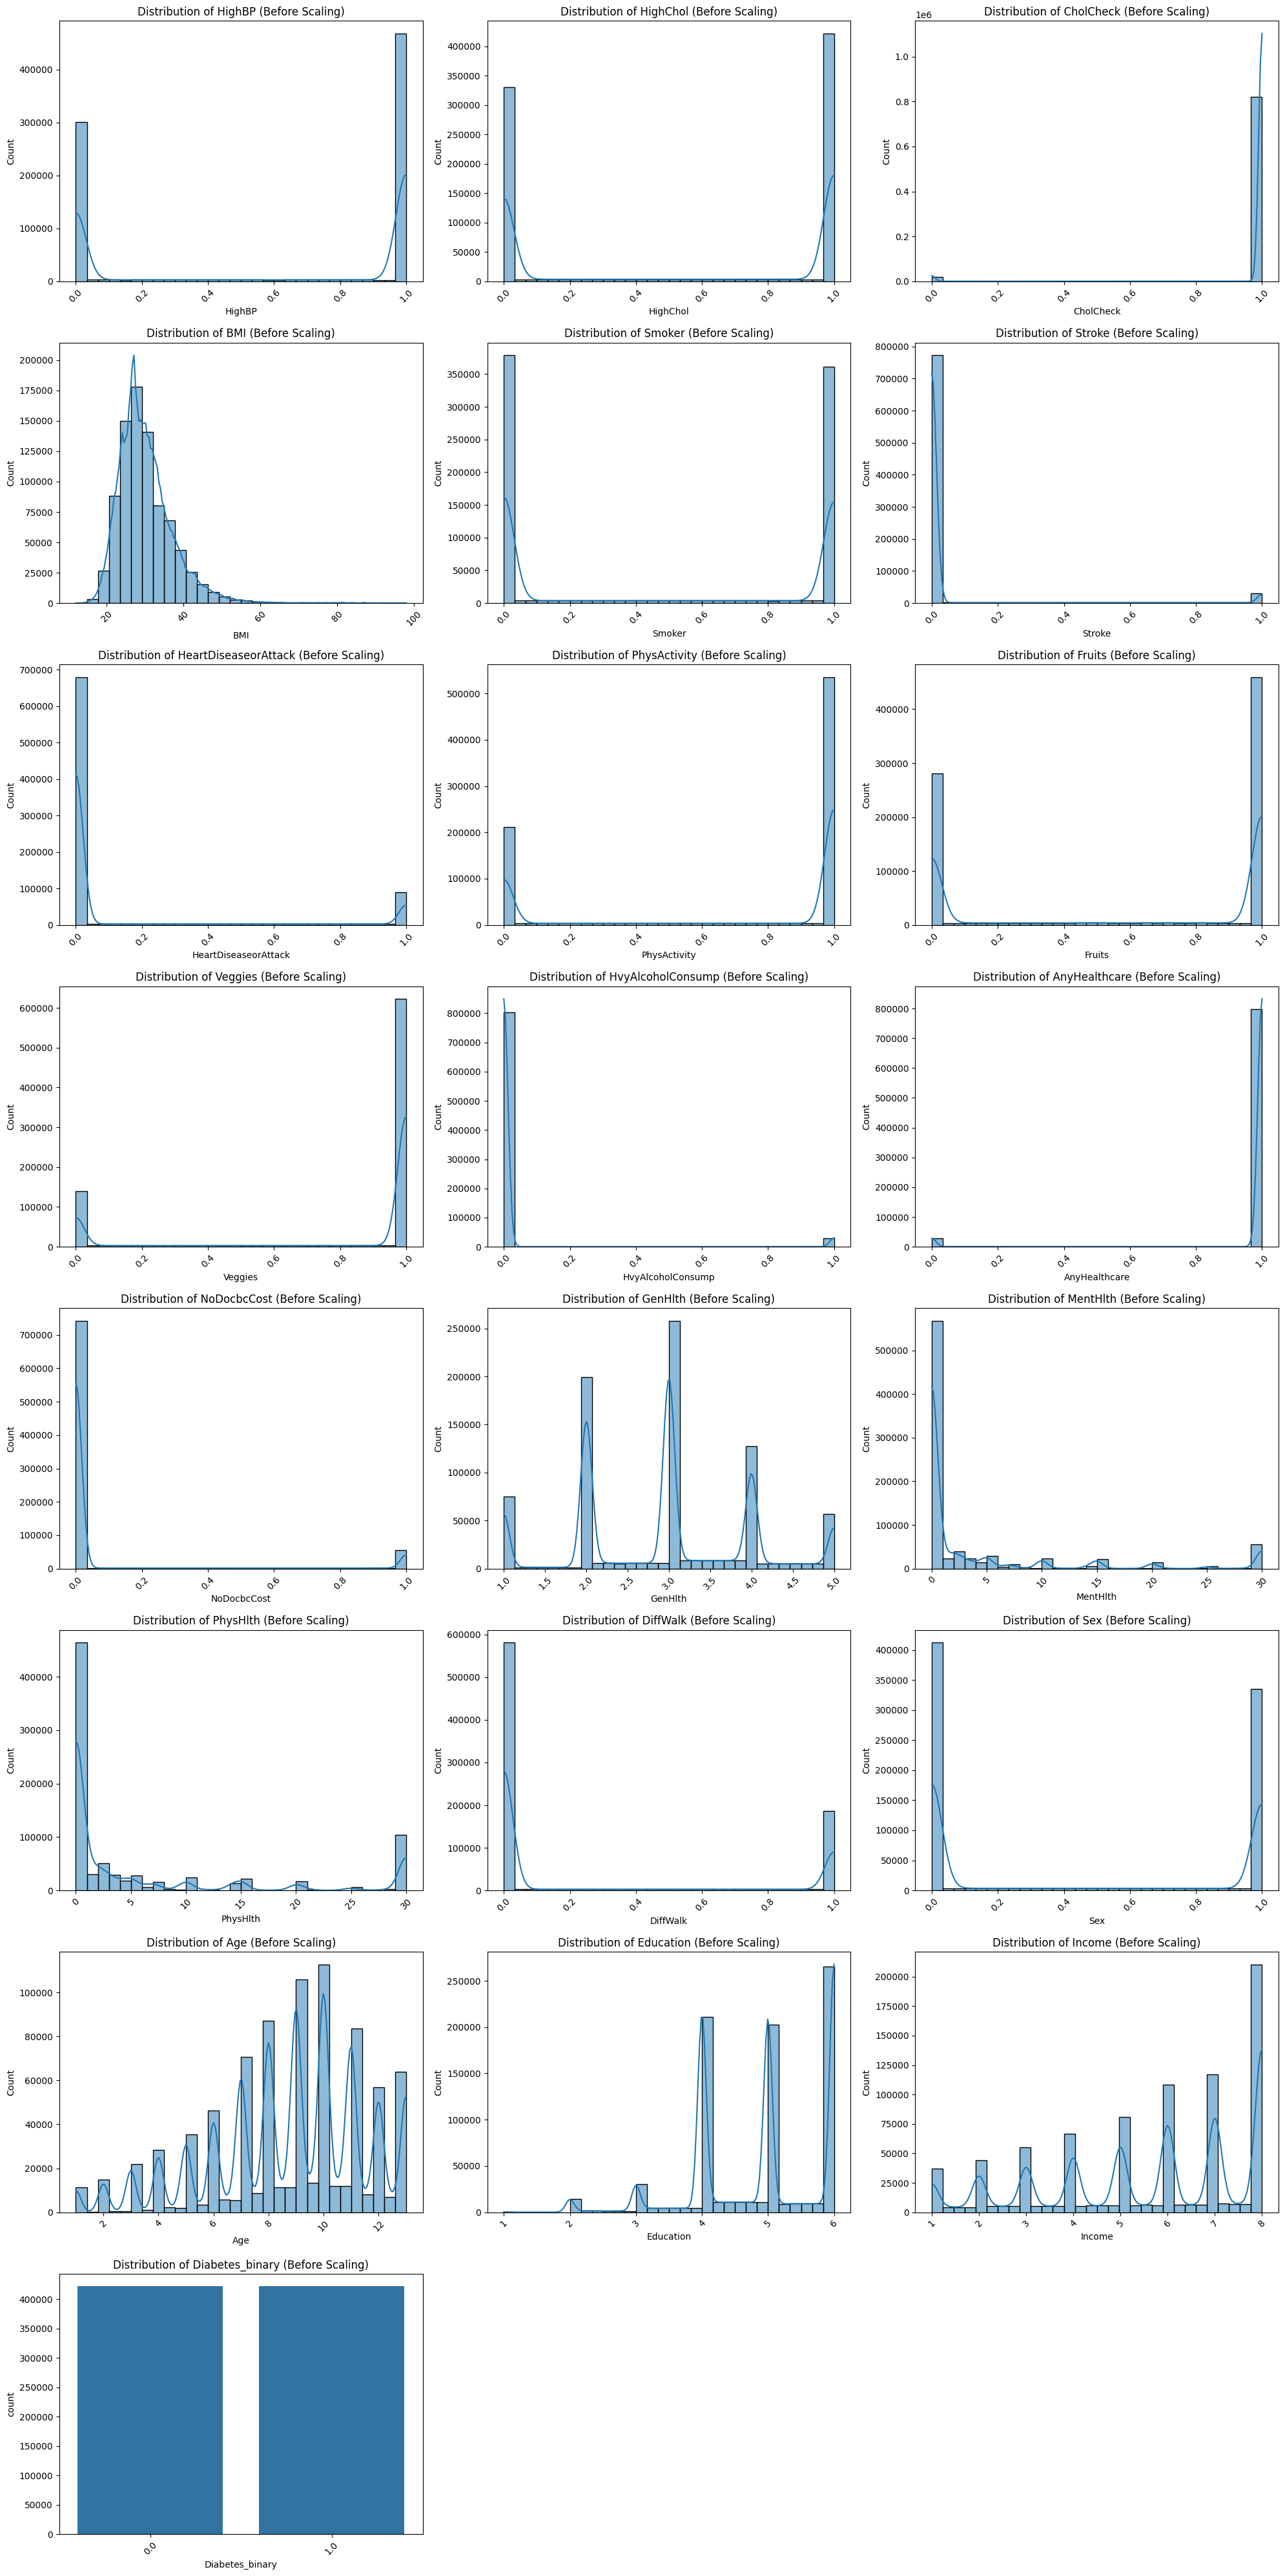

In [13]:

numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

# Limit to 10 features if there are more than 10
# if len(numeric_cols) > 10:
#     numeric_cols = numeric_cols[:10]

# Calculate the number of rows needed (3 plots per row)
n_rows = (len(numeric_cols) + 2) // 3  # Round up division

# Create subplots (3 per row)
fig, axes = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easier iteration

for i, col in enumerate(numeric_cols):
    if df[col].nunique() < 20:  # Treat as discrete
        sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index[:20])
    else:  # Treat as continuous
        sns.histplot(data=df, x=col, ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col} (Before Scaling)')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused subplots (if total plots not multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Handle outlier of BMI
Q1 = df["BMI"].quantile(0.25)
Q3 = df["BMI"].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def temp(x):
    if x > upper_bound:
        return upper_bound  
    elif x < lower_bound:
        return lower_bound  
    else:
        return x 
df['BMI'] = df['BMI'].apply(temp)

# handle outlier of MentHlth

Q1 = df["MentHlth"].quantile(0.25)
Q3 = df["MentHlth"].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def temp(x):
    if x > upper_bound:
        return upper_bound  
    elif x < lower_bound:
        return lower_bound  
    else:
        return x 
df['MentHlth'] = df['MentHlth'].apply(temp)

# handle outlier of PhysHlth

Q1 = df["PhysHlth"].quantile(0.25)
Q3 = df["PhysHlth"].quantile(0.75)
IQR = Q3 - Q1
lower_bound= Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
def temp(x):
    if x > upper_bound:
        return upper_bound  
    elif x < lower_bound:
        return lower_bound  
    else:
        return x 
df['PhysHlth'] = df['PhysHlth'].apply(temp)

In [15]:
# 1. Preprocessing
# Feature Engineering
df['Metabolic_Risk'] = df['HighBP'] + df['HighChol'] + (df['BMI'] > 30).astype(int)
df['Lifestyle_Score'] = df['PhysActivity'] - df['Smoker'] - (df['Veggies'] < 1).astype(int)
df['Age_BMI_Interaction'] = df['Age'] * (df['BMI'] / 10)
df['BP_Age'] = df['HighBP'] * (df['Age'] / 10)
df['Health_Risk'] = df['Metabolic_Risk'] + (df['GenHlth'] > 3).astype(int) + (df['PhysHlth'] > 7).astype(int)

In [16]:
# Scaling (if needed)
scaler = StandardScaler()
df[['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age_BMI_Interaction', 'BP_Age']] = scaler.fit_transform(
    df[['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age_BMI_Interaction', 'BP_Age']]
)

# Encoding (if needed)
df['Diabetes_binary'] = df['Diabetes_binary'].astype('category')

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

In [18]:
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X , y, test_size=0.3, stratify=y, random_state=42
)

In [20]:
RMSE=[]
R2=[]
from sklearn.metrics import  mean_squared_error, r2_score
def models(model):
    fit=model.fit(X_train,y_train)
    pre=model.predict(X_test)
    score=model.score(X_test,y_test)
    r2=r2_score(y_test,pre)
    mse=np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(mse)
    print(f"THE SCORE IS : {score}")

In [21]:
rf_model= RandomForestClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42
)

models(rf_model)

THE SCORE IS : 0.8654186943257121


In [22]:
from xgboost import XGBClassifier
xgb =  XGBClassifier(
    n_estimators=50,
    max_depth=10,
    random_state=42,
)
models(xgb)

THE SCORE IS : 0.954623851979903


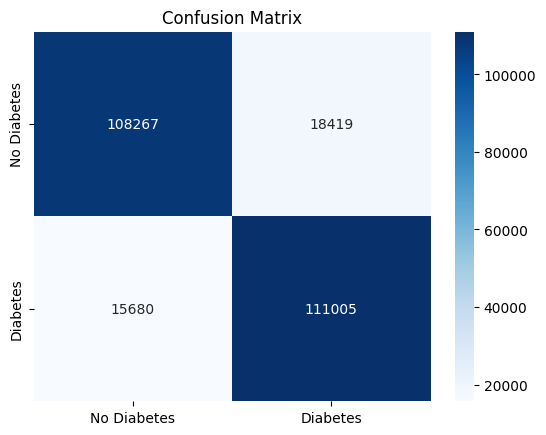

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.show()

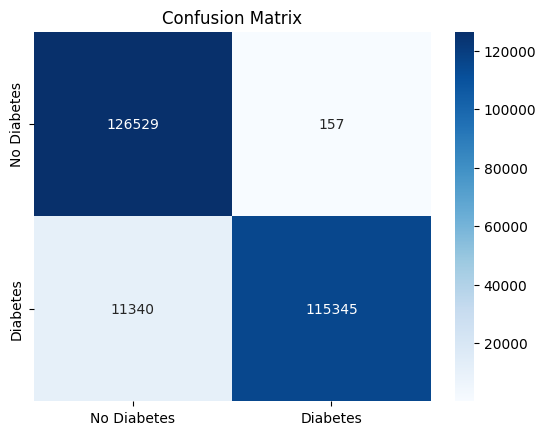

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score
y_pred = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.show()